# Linear Discriminant Analysis

<a class="anchor" id="0.1"></a>
### **Table of Contents**

1.	[LDA Steps](#1)
2.	[Assumptions and Preparation of Data for LDA](#2)
3.  [Limitations](#3)
4.  [Wine Data - Feature Reduction and CLassification](#4)
5.  [Difference between PCA and LDA](#5)

Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality 
and also reduce resources and dimensional costs.

The original technique was developed in the year 1936 by Ronald A. Fisher and was named Linear Discriminant or Fisher's Discriminant Analysis. 
The original Linear Discriminant was described as a two-class technique. The multi-class version was later generalized by C.R Rao as Multiple Discriminant Analysis. They are all simply referred to as the Linear Discriminant Analysis.

A classifier with a linear decision boundary, generated by fitting class
conditional densities to the data and using Bayes' rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

## **1. LDA Steps** <a class="anchor" id="1"></a>

Linear Discriminant Analysis can be broken up into the following steps:
- Compute the within class and between class scatter matrices
- Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
- Sort the eigenvalues and select the top k
- Create a new matrix containing eigenvectors that map to the k eigenvalues
- Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4

## **2. Assumptions and Preparation of Data for LDA** <a class="anchor" id="2"></a>

This section lists some suggestions you may consider when preparing your data for use with LDA.

- Classification Problems. 
    - LDA is intended for classification problems where the output variable is categorical.
    - LDA supports both binary and multi-class classification.
- Gaussian Distribution. 
    - The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).

- Same Variance. 
    - LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

## **3. Limitations**  <a class="anchor" id="3"></a>
- LDA produces at most 𝐶 − 1 feature projections
    - If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features
- LDA is a parametric method (it assumes unimodal Gaussian likelihoods)
    - If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification
    
- LDA explicitly attempts to model the difference between the classes of data. PCA on the other hand does not take into account any difference in class

![O](lda.png)

## **4. Wine Data - Feature Reduction and CLassification**  <a class="anchor" id="4"></a>
 

In [63]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

In [46]:
wine_info = load_wine()

X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)

In [47]:
X.shape

(178, 13)

In [48]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# We have three categories
wine_info.target_names 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### Label Encoding 

In [49]:
le = LabelEncoder()
y1 = le.fit_transform(y)

### LDA Algorithm for Feature Reduction

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(n_components=2)
X_lda = model.fit_transform(X, y1)

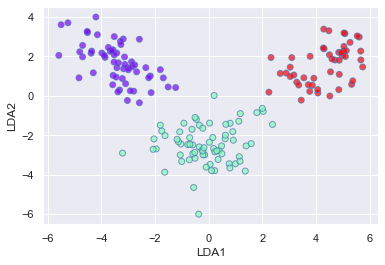

In [72]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y1,cmap='rainbow',alpha=0.7,edgecolors='b')
data = [X_lda, y]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_lda , y1, test_size = 0.5, random_state=0)

### LDA for classification

In [77]:
from sklearn.model_selection import cross_val_score

lda = LDA()
#train model with cv of 5 
cv_scores = cross_val_score(lda, X_lda, y1, cv=5)


#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[1. 1. 1. 1. 1.]
cv_scores mean:1.0
